# Applying Chi Square Test to NC Congressional Districts 


## Load Data

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

df = pd.read_csv('data/congressional_election_results_post1948.csv')
df['winner_vote_share'] = df['D Voteshare'].apply(lambda x: x if x > 0.5 else 1- x)

Observed data: Winner's Vote Share in NC Congressional Districts after 2010 redraw


Expected data: Winner's Vote Share in NC Congressional Districts before 2010 redraw

In [141]:
observed_mask = (df.Year.isin(['2012','2014','2016', '2018'])) & (df.State == 'NC')
expected_mask = (df.Year.isin(['2002','2004','2006', '2008', '2010'])) & (df.State == 'NC')

## 2.35% bins

#### Bin size rational

In [142]:
std_winner_vote_share = np.std(df[observed_mask].groupby('Year')['winner_vote_share'].mean())
bin_width = std_winner_vote_share
print('bins width: ', bin_width)

bins width:  0.023503461250500034


#### Graphs and Tests

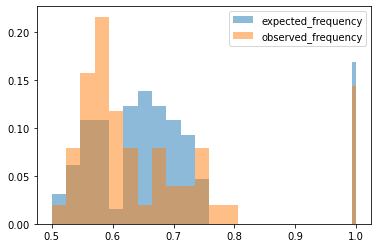

In [143]:
bins = [.5 + bin_width*idx for idx in range(int(np.ceil(.5/ bin_width)))]
bins.append(1)

observed_vote_shares = df[observed_mask]['winner_vote_share']
observed_frequency, bins1 = np.histogram(observed_vote_shares, bins, density=True)
expected_vote_shares = df[expected_mask]['winner_vote_share']
expected_frequency, bins2 = np.histogram(expected_vote_shares, bins, density=True)

fig, ax = plt.subplots()
ax.hist(bins2[:-1], bins2, weights=(expected_frequency*bin_width), label='expected_frequency',  histtype='stepfilled', alpha=.5)
ax.hist(bins1[:-1], bins1, weights=(observed_frequency*bin_width), label ='observed_frequency', histtype='stepfilled', alpha=.5)
ax.legend()

Chi-square test considering most contiguous bins where Observed and Expected are non-zero.

In [144]:
stats.chisquare(observed_frequency[0:11], expected_frequency[0:11])

Power_divergenceResult(statistic=44.68451228343471, pvalue=2.4790253105655745e-06)

Chi-square test considering just the first 4 bins

In [145]:
stats.chisquare(observed_frequency[0:4], expected_frequency[0:4])

Power_divergenceResult(statistic=5.93243886758752, pvalue=0.11494388779134035)

## 4% bins

Bin size Rational

In [148]:
std_winner_vote_share = np.std(df[observed_mask | expected_mask].groupby('Year')['D Voteshare'].mean())
bin_width = std_winner_vote_share
print('bins width: ', bin_width)

bins width:  0.04015513189835897


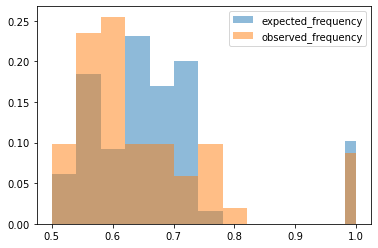

In [149]:
bins = [.5 + bin_width*idx for idx in range(int(np.ceil(.5/ bin_width)))]
bins.append(1)

observed_vote_shares = df[observed_mask]['winner_vote_share']
observed_frequency, bins1 = np.histogram(observed_vote_shares, bins, density=True)
expected_vote_shares = df[expected_mask]['winner_vote_share']
expected_frequency, bins2 = np.histogram(expected_vote_shares, bins, density=True)

fig, ax = plt.subplots()
ax.hist(bins2[:-1], bins2, weights=(expected_frequency*bin_width), label='expected_frequency',  histtype='stepfilled', alpha=.5)
ax.hist(bins1[:-1], bins1, weights=(observed_frequency*bin_width), label ='observed_frequency', histtype='stepfilled', alpha=.5)
ax.legend()

Chi-square test considering most contiguous bins where Observed and Expected are non-zero.

In [150]:
stats.chisquare(observed_frequency[0:7], expected_frequency[0:7])

Power_divergenceResult(statistic=24.20541089030487, pvalue=0.00047871395931947495)

Chi-square test considering just the first 4 bins

In [151]:
stats.chisquare(observed_frequency[0:4], expected_frequency[0:4])

Power_divergenceResult(statistic=9.919103789161225, pvalue=0.01926644862943319)